## Libraries 


In [573]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Analyte

In [527]:
df = pd.read_csv('data.csv')
X = df['Wavelength']
Y1 = df['1']
Y2 = df['2']
Y3 = df['3']

Text(0.5, 0, 'Concentration [μmol]')

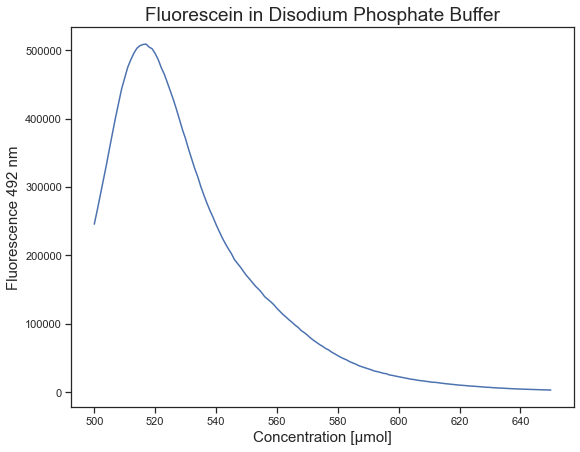

In [528]:
f, ax = plt.subplots(figsize=(9, 7))
sns.lineplot(x=X,y=Y1)
ax.set_title('Fluorescein in Disodium Phosphate Buffer', fontsize = 19)
ax.set_ylabel('Fluorescence 492 nm', fontsize = 15)
ax.set_xlabel('Concentration [μmol]',fontsize = 15)
# ax.legend(loc='upper right',frameon=True,fontsize = 15)

In [671]:
unk_516nm = df[(df['Wavelength'] == 516) ]
unk_Fluoro_516nm = unk_516nm.drop(unk.columns[[2,3]], axis=1)
analyte_X_wl = unk_Fluoro_516nm['Wavelength']
analyte_Y_fluoro = unk_Fluoro_516nm['1']

## Limit Detection

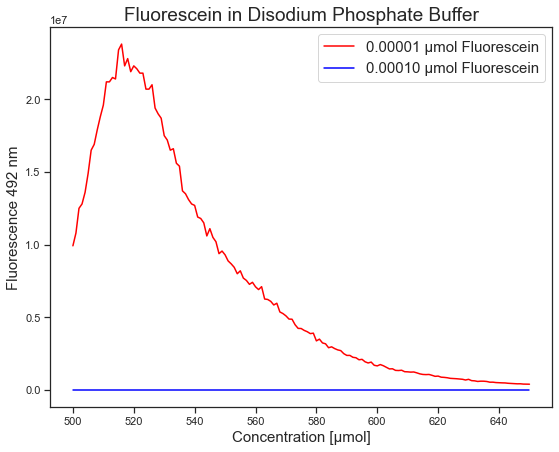

In [530]:
f, ax = plt.subplots(figsize=(9, 7))
sns.lineplot(x=X,y=Y3, label = '0.00001 μmol Fluorescein', color = 'red')
sns.lineplot(x=X,y=Y2, label = '0.00010 μmol Fluorescein', color = 'blue')
ax.set_title('Fluorescein in Disodium Phosphate Buffer', fontsize = 19)
ax.set_ylabel('Fluorescence 492 nm', fontsize = 15)
ax.set_xlabel('Concentration [μmol]',fontsize = 15)
ax.legend(loc='upper right',frameon=True,fontsize = 15)

## Calibration Curve

In [631]:
df1 = pd.read_csv('standard.csv')

Text(0.5, 0, 'Concentration [μmol]')

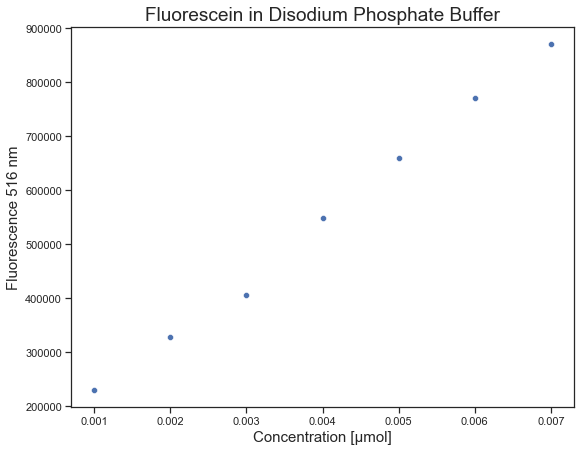

In [791]:
f, ax = plt.subplots(figsize=(9, 7)) 
sns.scatterplot(x='Concentration', y ='Fluorescence', data = df1, ax=ax )
ax.set_title('Fluorescein in Disodium Phosphate Buffer', fontsize = 19)
ax.set_ylabel('Fluorescence 516 nm', fontsize = 15)
ax.set_xlabel('Concentration [μmol]',fontsize = 15)

## Linear Regression 

In [636]:
from sklearn import linear_model

Text(0.5, 0, 'Concentration [μmol]')

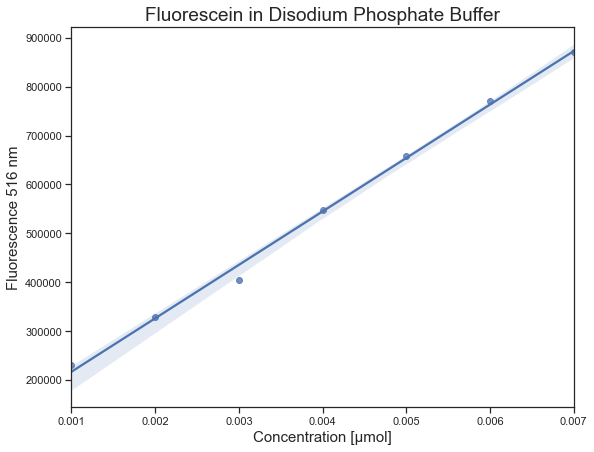

In [790]:
f, ax = plt.subplots(figsize=(9, 7)) 
sns.regplot(x='Concentration', y ='Fluorescence', data = df1, ax=ax )
ax.set_title('Fluorescein in Disodium Phosphate Buffer', fontsize = 19)
ax.set_ylabel('Fluorescence 516 nm', fontsize = 15)
ax.set_xlabel('Concentration [μmol]',fontsize = 15)

### Concentration of Fluorescein in Disodium Phosphate Buffer

In [777]:
reg = linear_model.LinearRegression()
reg.fit(df1[['Fluorescence']], df1.Concentration)

LinearRegression()

In [772]:
Coefficient = str(reg.coef_)
Intercept = str(reg.intercept_)
Unknown_Concentration = str(reg.predict([analyte_Y_fluoro]))

In [787]:
print("The Gradient Coefficient is:  " + Coefficient)
print("The Y Intercept is:  " + Intercept)


The Gradient Coefficient is:  [9.11517423e-09]
The Y Intercept is:  -0.0009662702590968828


In [789]:
print("Fluorescein Concentration in Disodium Phosphate Buffer is: " +Unknown_Concentration + " μmol")

Fluorescein Concentration in Disodium Phosphate Buffer is: [0.00366672] μmol
